# Supervised vs unsupervised learning
When dealing with machine learning problems, there are generally two types of data (and machine learning models):
- **Supervised data**: always has one or multiple targets associated with it.
- **Unsupervised data**: does not have any target variable.


- A supervised problem is considerably easier to tackle than an unsupervised one

- Supervised problems can be divided into two sub-classes:
     - **Classification**: predicting a category, e.g. dog or cat.
     - **Regression**: predicting a value, e.g. house prices.
     
     
- Note : Sometimes we might use regression in a classification setting depending on the metric used for evaluation. But we will come to that later.


- To make sense of unsupervised problems, we can also use numerous decomposition techniques such as **Principal Component Analysis (PCA), t-distributed Stochastic Neighbour Embedding (t-SNE)** etc.

In [1]:
# To Create dataframes from the numerical arrays
import pandas as pd

#To handle the numerical arrays
import numpy as np

# For plotting
from matplotlib import pyplot as plt
import seaborn as sns

# To get data and perform t-SNE
from sklearn import datasets
from sklearn import manifold

datasets?

The :mod:`sklearn.datasets` module includes utilities to load datasets,
including methods to load and fetch popular reference datasets. It also
features some artificial data generators.

<hr>
manifold?

The :mod:`sklearn.manifold` module implements data embedding techniques.

In [2]:
data = datasets.fetch_openml(
            "mnist_784",
            version = 1,
            return_X_y = True
            )
pixel_values,targets = data


In [18]:
# pixel_values

In [14]:
img_arrs = pixel_values.values

In [35]:
img_arrs.shape

(70000, 784)

In [ ]:
targets

In [3]:
datasets.fetch_openml?

1


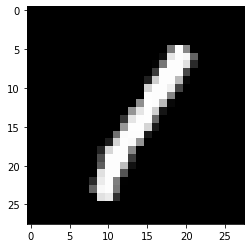

In [29]:
idx = 23
# plt.figure()
plt.imshow(img_arrs[idx].reshape(28,28),cmap="gray")
print(targets[idx])

In [31]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(img_arrs[:3000, :])

In [37]:
transformed_data.shape

(3000, 2)

In [73]:
a = np.array(targets[:3000].values)
for idx in range(0,len(a)):
    a[idx]  = int(a[idx])


In [74]:
a[0]

5

In [72]:
# targets

In [71]:
type(a[2])

str

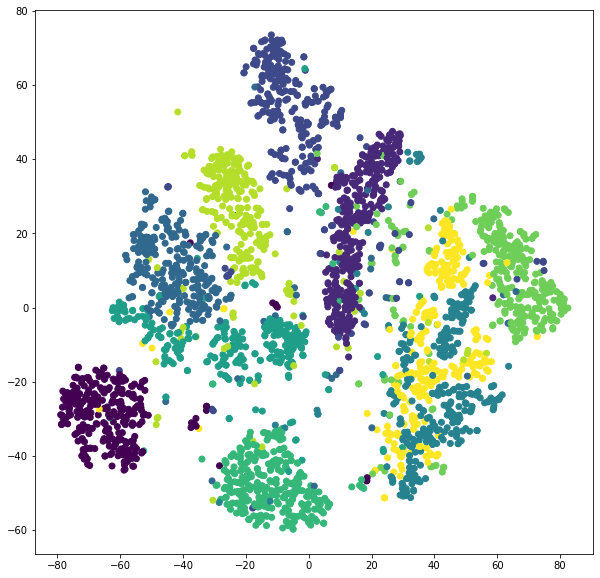

In [86]:
plt.figure(figsize=(10,10))
plt.scatter(transformed_data[:,1],transformed_data[:,0],c = a)


This step creates the t-SNE transformation of the data. We use only two components as we can visualize them well in a two-dimensional setting. The transformed_data, in this case, is an array of shape 3000x2 (3000 rows and 2 columns). A data like this can be converted to a pandas dataframe by calling pd.DataFrame on the array.

In [32]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"] )
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

/Users/kushidhar/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


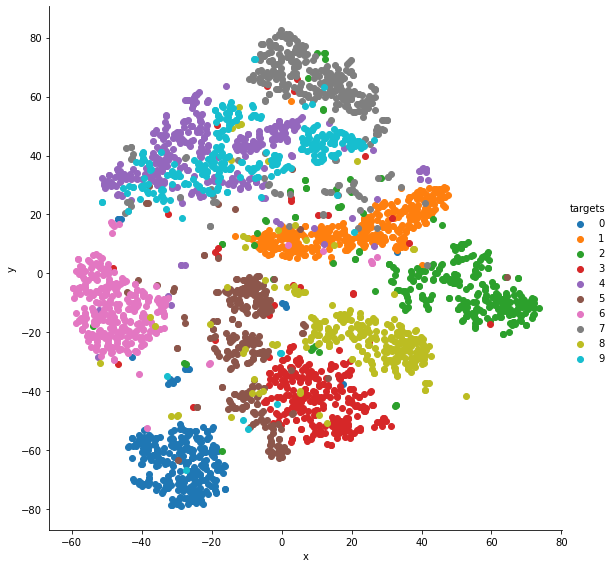

In [34]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()